Change n_components in pca = PCA(n_components=8) to change number of principal components and change n_clusters in
kmeans = KMeans(n_clusters=7,random_state=42) to change number of clusters. Every other stuff shall be updated automatically. Assumes there will be only 1 most found original label in clusters, if multiple shows the first one.

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve

dataset = pd.read_csv("Data.csv")
dataset.head(5)

,centroid_max,centroid_min,centroid_mean,centroid_std,centroid_kurtosis,centroid_skew,roloff_max,roloff_min,roloff_mean,roloff_std,...,mfcc_11_kurtosis,mfcc_11_skew,mfcc_12_max,mfcc_12_min,mfcc_12_mean,mfcc_12_std,mfcc_12_kurtosis,mfcc_12_skew,tempo,genre
0,4031.364538,1027.079258,1784.420446,360.263361,5.246790,1.537974,7644.287109,1830.322266,3806.485316,949.558806,...,-0.189109,-0.110339,22.482096,-26.569305,-3.667368,6.422199,0.313302,-0.037197,123.046875,blues
1,5444.293577,421.091729,1529.835316,613.175361,4.028086,1.339397,8085.717773,333.764648,3548.820207,1725.249654,...,0.054884,0.154526,19.230034,-27.189579,-2.239120,8.055376,-0.182963,0.004210,107.666016,blues
2,4669.770713,417.254802,1552.481958,395.634070,11.609763,1.930126,6556.860352,441.430664,3040.514948,884.938380,...,0.542265,-0.682770,23.078028,-28.854303,-8.905224,7.774160,0.489465,0.710559,161.499023,blues
3,3236.442116,318.713500,1070.119953,429.532791,1.803354,1.001449,7611.987305,387.597656,2185.028454,1222.395194,...,1.569782,0.613722,20.651333,-32.890564,-2.476421,7.538023,0.499351,-0.163374,172.265625,blues
4,4464.156642,849.658285,1835.494603,585.961468,1.536058,1.049734,7084.423828,1152.026367,3580.945013,1253.915665,...,0.430401,0.456069,24.070387,-36.607307,-6.934123,9.466887,0.057030,0.132279,135.999178,blues


In [0]:
X = dataset.drop(['genre'], axis=1)
Y = dataset['genre']

scale = StandardScaler()
X_scaled = pd.DataFrame(scale.fit_transform(X), columns = X.columns)

encoder = LabelEncoder()
Y_enc = encoder.fit_transform(Y)

PCA

In [0]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3,whiten=False);
pca.fit(X_scaled)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

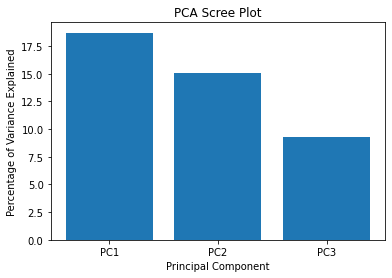

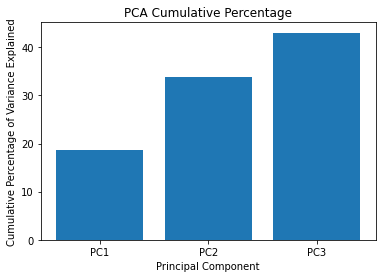

In [0]:
percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2)
columns = np.array(['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10'])
plt.figure(1)
plt.bar(columns[:pca.n_components], np.array(percent_variance[:pca.n_components]))
plt.ylabel('Percentage of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA Scree Plot')
plt.show()

percent_cumulative_variance = np.cumsum(percent_variance)
plt.figure(2)
plt.bar(columns[:pca.n_components], np.array(percent_cumulative_variance[:pca.n_components]))
plt.ylabel('Cumulative Percentage of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA Cumulative Percentage')
plt.show()

In [0]:
xPCA = pca.transform(X_scaled)

KMEANS

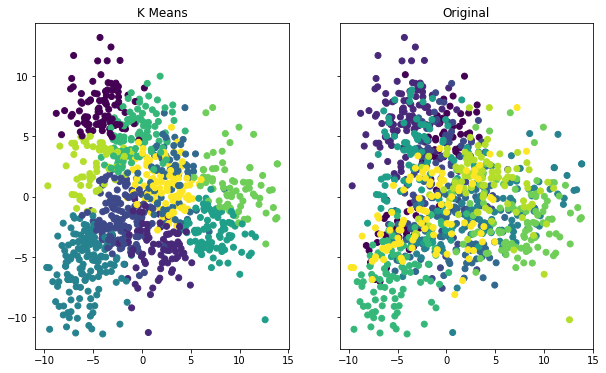

In [0]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10,random_state=42)
kmeans.fit(xPCA)

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(10,6))
ax1.set_title('K Means')
ax1.scatter(xPca[:,0], xPca[:,1], c=kmeans.labels_)
ax2.set_title("Original")
ax2.scatter(xPca[:,0], xPca[:,1], c=Y_enc)

In [0]:
def success(label,columns,sums):
    mostNum = np.amax(label)
    mostLb = label.index(mostNum)
    mostLabel = columns[mostLb]
    print("Most found label: " + mostLabel)
    print("Number of " + mostLabel + " found :" + str(mostNum))
    total = np.sum(label)
    print("Population of cluster: " + str(total))
    mostSum = sums[mostLb]
    mostAbility = round(100*mostNum/mostSum,1)
    print("Percentage of " + mostLabel + " found: " + str(mostAbility) + "%")  
    ability = round(100*mostNum/total, 1)
    print("Ability to distinguish " + mostLabel + " amoung other found genres in cluster: " + str(ability)+"%")

In [0]:
def compareLabels(clusterLabels,trueLabels,labelNum,columns,plot=1):
    score = 0
    sums = [0]*10
    for k in trueLabels:
        sums[k] +=1
    for i in range(labelNum):
        if i ==0:
            clusters = [clusterLabels.index[clusterLabels[0]==i].to_numpy()]
            label = [0]*10
            for x in clusters[i]:
                label[Y_enc[x]] += 1
            labels = [label]
        else:
            clusters.append(clusterLabels.index[clusterLabels[0]==i].to_numpy())
            label = [0]*10
            for x in clusters[i]:
                label[Y_enc[x]] += 1
            labels.append(label)
        if plot==1:
            plt.figure(figsize=(8, 4))
            plt.bar(columns,label)
            title = "Match for cluster label " + str(i)
            plt.title(title)
            plt.show()
            success(labels[i],columns,sums)
    return clusters,labels

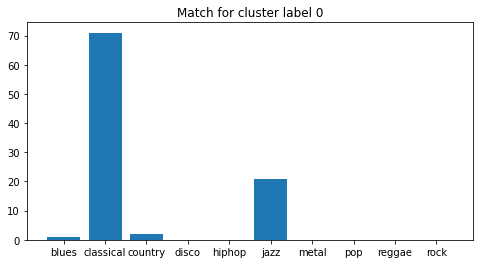

Most found label: classical
Number of classical found :71
Population of cluster: 95
Percentage of classical found: 71.0%
Ability to distinguish classical amoung other found genres in cluster: 74.7%


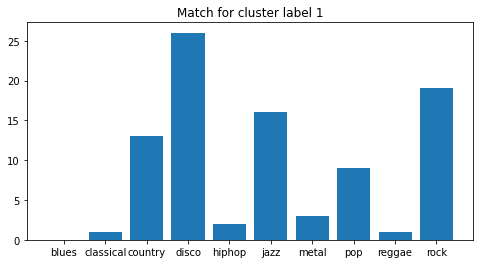

Most found label: disco
Number of disco found :26
Population of cluster: 90
Percentage of disco found: 26.0%
Ability to distinguish disco amoung other found genres in cluster: 28.9%


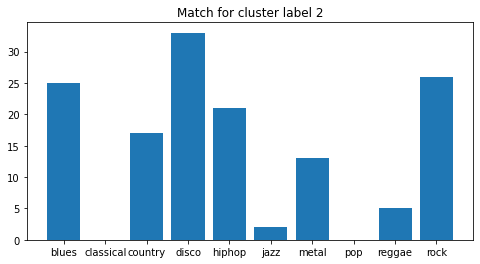

Most found label: disco
Number of disco found :33
Population of cluster: 142
Percentage of disco found: 33.0%
Ability to distinguish disco amoung other found genres in cluster: 23.2%


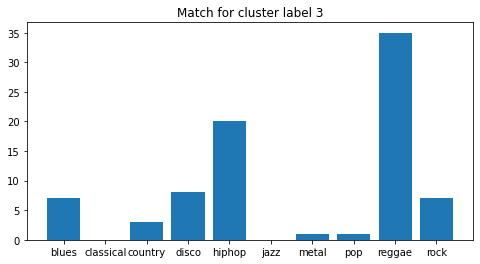

Most found label: reggae
Number of reggae found :35
Population of cluster: 82
Percentage of reggae found: 35.0%
Ability to distinguish reggae amoung other found genres in cluster: 42.7%


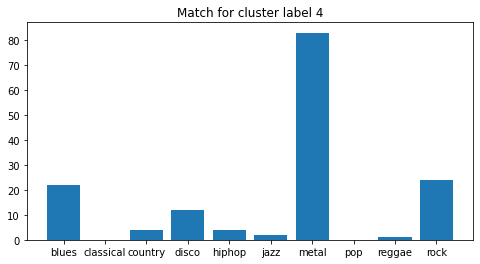

Most found label: metal
Number of metal found :83
Population of cluster: 152
Percentage of metal found: 83.0%
Ability to distinguish metal amoung other found genres in cluster: 54.6%


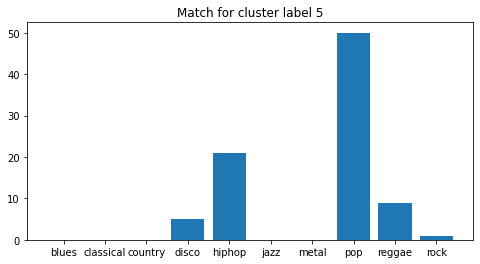

Most found label: pop
Number of pop found :50
Population of cluster: 86
Percentage of pop found: 50.0%
Ability to distinguish pop amoung other found genres in cluster: 58.1%


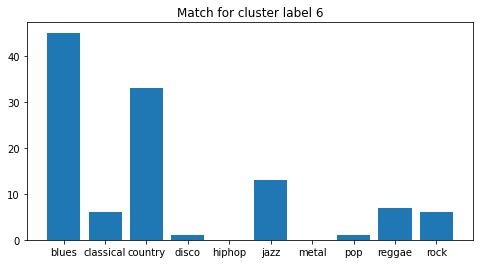

Most found label: blues
Number of blues found :45
Population of cluster: 112
Percentage of blues found: 45.0%
Ability to distinguish blues amoung other found genres in cluster: 40.2%


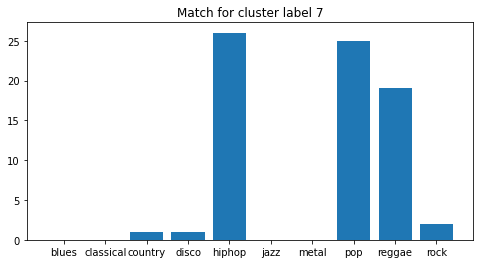

Most found label: hiphop
Number of hiphop found :26
Population of cluster: 74
Percentage of hiphop found: 26.0%
Ability to distinguish hiphop amoung other found genres in cluster: 35.1%


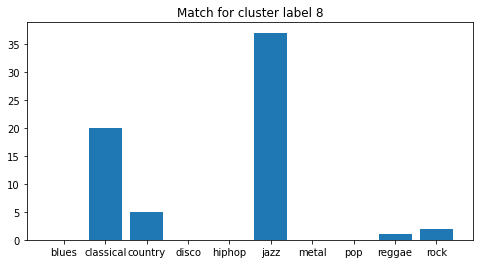

Most found label: jazz
Number of jazz found :37
Population of cluster: 65
Percentage of jazz found: 37.0%
Ability to distinguish jazz amoung other found genres in cluster: 56.9%


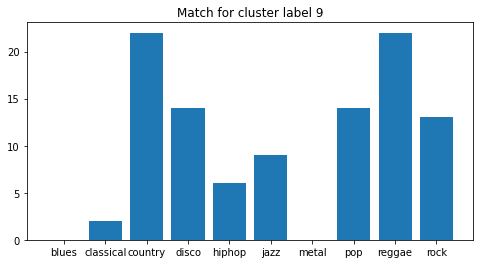

Most found label: country
Number of country found :22
Population of cluster: 102
Percentage of country found: 22.0%
Ability to distinguish country amoung other found genres in cluster: 21.6%


In [0]:
columns = Y.unique()
clusterLabels = pd.DataFrame(kmeans.labels_)
clusters,labels = compareLabels(clusterLabels,Y_enc,kmeans.n_clusters,columns)

In [0]:
from sklearn import metrics

metrics.adjusted_rand_score(Y_enc, kmeans.labels_)

0.2209574614562368

In [0]:
score = [0]*10

for i in range(1,10):
    pca = PCA(n_components=i,whiten=False)
    xPCA = pca.fit_transform(X_scaled)
    kmeans = KMeans(n_clusters=10,random_state=42)
    kmeans.fit(xPCA)
    score[i] = metrics.adjusted_rand_score(Y_enc, kmeans.labels_)

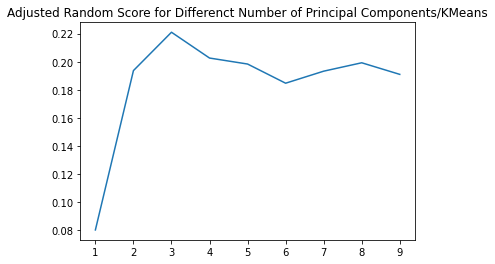

In [0]:
plt.plot(range(1,10),score[1:])
plt.title("Adjusted Random Score for Differenct Number of Principal Components/KMeans")
plt.show()

Spectural Clustering

In [0]:
from sklearn.cluster import SpectralClustering

spec = SpectralClustering(n_clusters=10,assign_labels="discretize",random_state=42,affinity="nearest_neighbors",
                         n_neighbors=20)
pcaSpec = PCA(n_components=3,whiten=False);
xPcaSpec = pcaSpec.fit_transform(X_scaled)
spec.fit(xPcaSpec)

SpectralClustering(affinity='nearest_neighbors', assign_labels='discretize',
                   coef0=1, degree=3, eigen_solver=None, eigen_tol=0.0,
                   gamma=1.0, kernel_params=None, n_clusters=10,
                   n_components=None, n_init=10, n_jobs=None, n_neighbors=20,
                   random_state=42)

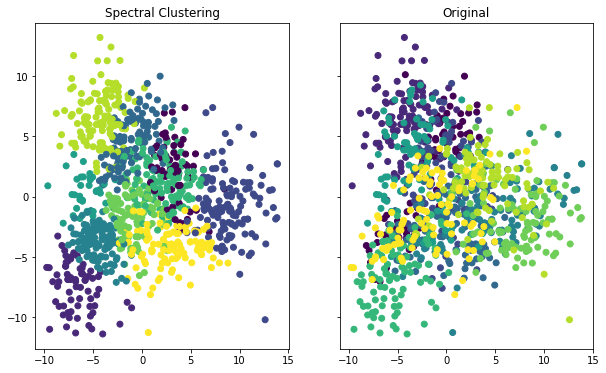

In [0]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(10,6))
ax1.set_title('Spectral Clustering')
ax1.scatter(xPcaSpec[:,0], xPcaSpec[:,1], c=spec.labels_)
ax2.set_title("Original")
ax2.scatter(xPcaSpec[:,0], xPcaSpec[:,1], c=Y_enc)
plt.show()

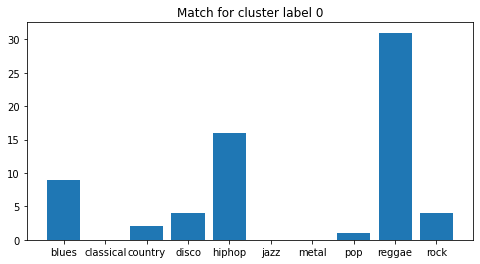

Most found label: reggae
Number of reggae found :31
Population of cluster: 67
Percentage of reggae found: 31.0%
Ability to distinguish reggae amoung other found genres in cluster: 46.3%


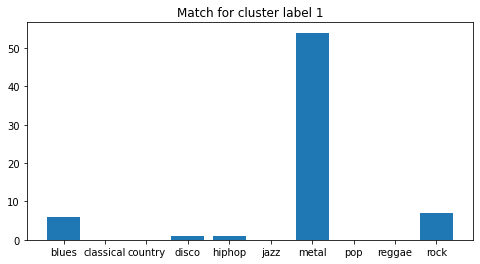

Most found label: metal
Number of metal found :54
Population of cluster: 69
Percentage of metal found: 54.0%
Ability to distinguish metal amoung other found genres in cluster: 78.3%


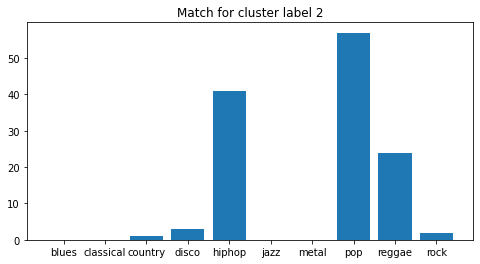

Most found label: pop
Number of pop found :57
Population of cluster: 128
Percentage of pop found: 57.0%
Ability to distinguish pop amoung other found genres in cluster: 44.5%


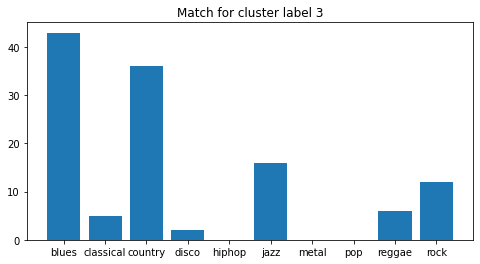

Most found label: blues
Number of blues found :43
Population of cluster: 120
Percentage of blues found: 43.0%
Ability to distinguish blues amoung other found genres in cluster: 35.8%


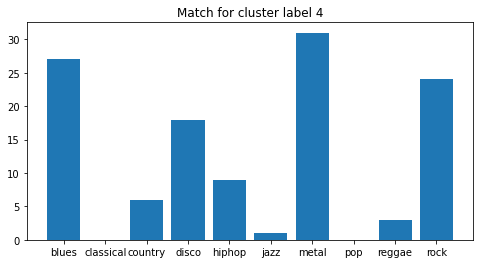

Most found label: metal
Number of metal found :31
Population of cluster: 119
Percentage of metal found: 31.0%
Ability to distinguish metal amoung other found genres in cluster: 26.1%


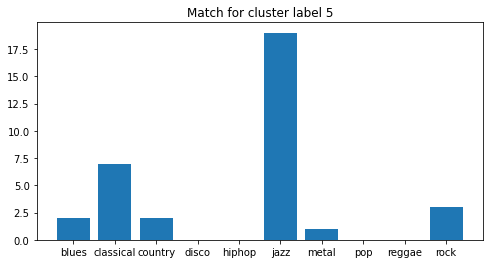

Most found label: jazz
Number of jazz found :19
Population of cluster: 34
Percentage of jazz found: 19.0%
Ability to distinguish jazz amoung other found genres in cluster: 55.9%


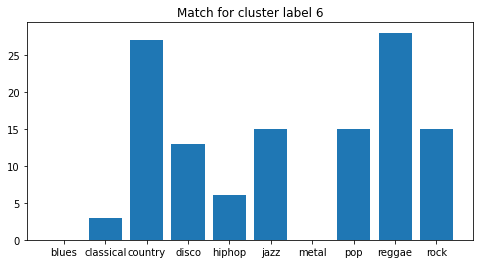

Most found label: reggae
Number of reggae found :28
Population of cluster: 122
Percentage of reggae found: 28.0%
Ability to distinguish reggae amoung other found genres in cluster: 23.0%


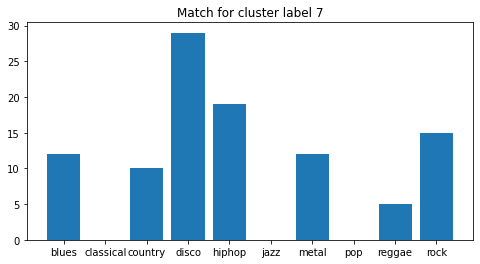

Most found label: disco
Number of disco found :29
Population of cluster: 102
Percentage of disco found: 29.0%
Ability to distinguish disco amoung other found genres in cluster: 28.4%


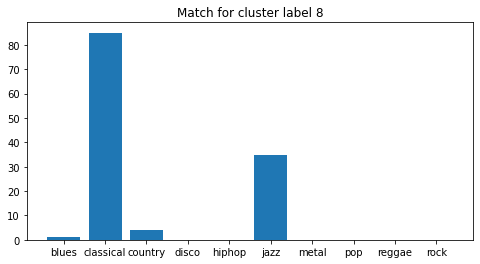

Most found label: classical
Number of classical found :85
Population of cluster: 125
Percentage of classical found: 85.0%
Ability to distinguish classical amoung other found genres in cluster: 68.0%


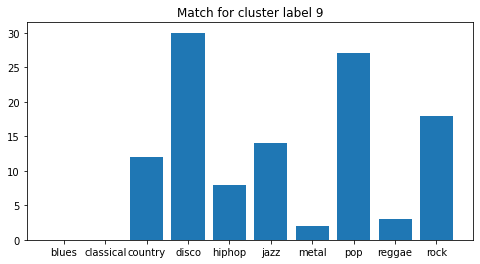

Most found label: disco
Number of disco found :30
Population of cluster: 114
Percentage of disco found: 30.0%
Ability to distinguish disco amoung other found genres in cluster: 26.3%


In [0]:
clusterLabels = pd.DataFrame(spec.labels_)
clusters,labels = compareLabels(clusterLabels,Y_enc,spec.n_clusters,columns)

In [0]:
score = [0]*10

for i in range(1,10):
    pca = PCA(n_components=i,whiten=False)
    xPCA = pca.fit_transform(X_scaled)
    spec = SpectralClustering(n_clusters=10,assign_labels="discretize",random_state=42,affinity="nearest_neighbors",
                         n_neighbors=20)
    spec.fit(xPCA)
    score[i] = metrics.adjusted_rand_score(Y_enc, spec.labels_)

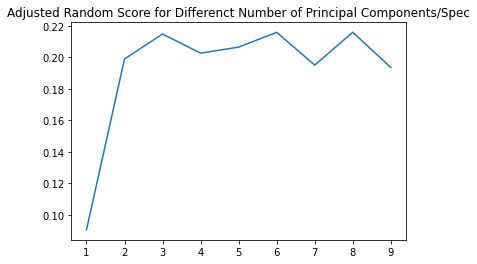

In [0]:
plt.plot(range(1,10),score[1:])
plt.title("Adjusted Random Score for Differenct Number of Principal Components/Spec")
plt.show()

Agglomerative Clustering

In [0]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters = 10,linkage="ward",affinity="euclidean")
pcaAc = PCA(n_components=3,whiten=False);
xPcaAc = pcaAc.fit_transform(X_scaled)
ac.fit(xPcaAc)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=10)

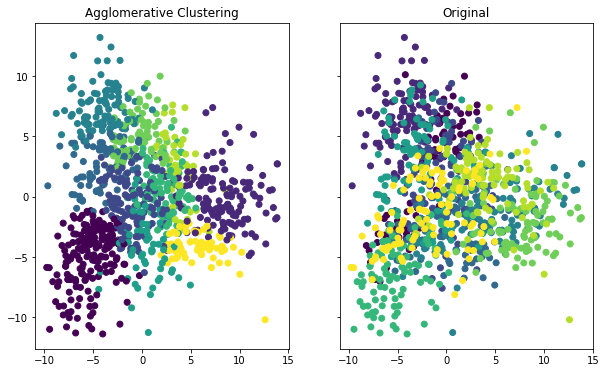

In [0]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(10,6))
ax1.set_title('Agglomerative Clustering')
ax1.scatter(xPcaAc[:,0], xPcaAc[:,1], c=ac.labels_)
ax2.set_title("Original")
ax2.scatter(xPcaAc[:,0], xPcaAc[:,1], c=Y_enc)
plt.show()

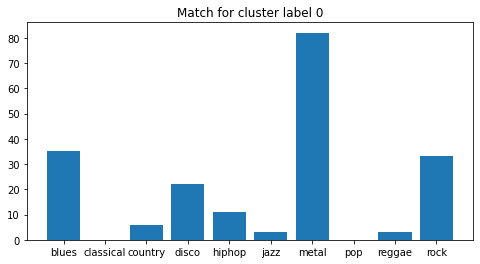

Most found label: metal
Number of metal found :82
Population of cluster: 195
Percentage of metal found: 82.0%
Ability to distinguish metal amoung other found genres in cluster: 42.1%


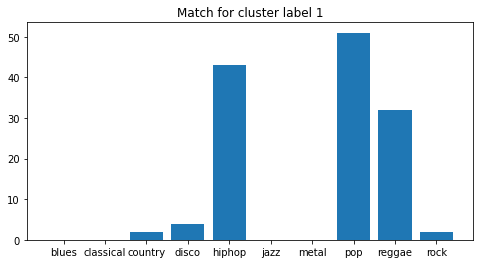

Most found label: pop
Number of pop found :51
Population of cluster: 134
Percentage of pop found: 51.0%
Ability to distinguish pop amoung other found genres in cluster: 38.1%


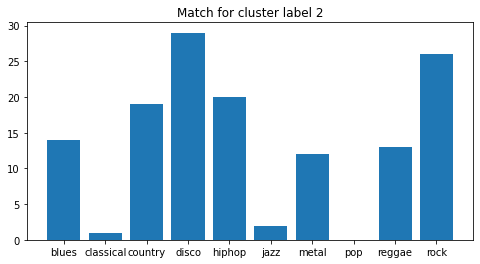

Most found label: disco
Number of disco found :29
Population of cluster: 136
Percentage of disco found: 29.0%
Ability to distinguish disco amoung other found genres in cluster: 21.3%


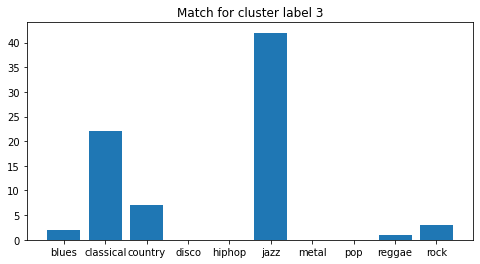

Most found label: jazz
Number of jazz found :42
Population of cluster: 77
Percentage of jazz found: 42.0%
Ability to distinguish jazz amoung other found genres in cluster: 54.5%


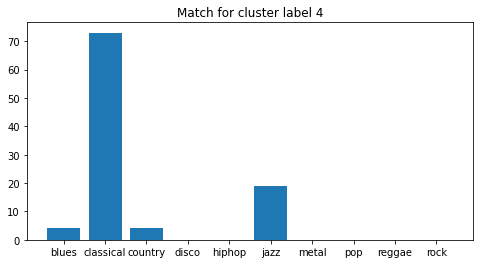

Most found label: classical
Number of classical found :73
Population of cluster: 100
Percentage of classical found: 73.0%
Ability to distinguish classical amoung other found genres in cluster: 73.0%


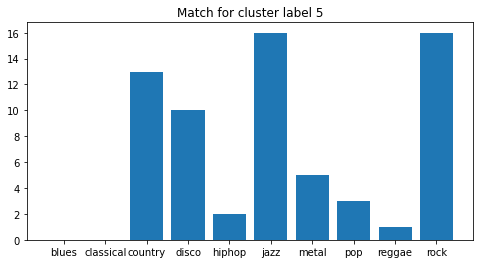

Most found label: jazz
Number of jazz found :16
Population of cluster: 66
Percentage of jazz found: 16.0%
Ability to distinguish jazz amoung other found genres in cluster: 24.2%


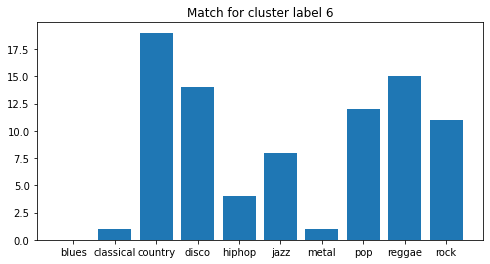

Most found label: country
Number of country found :19
Population of cluster: 85
Percentage of country found: 19.0%
Ability to distinguish country amoung other found genres in cluster: 22.4%


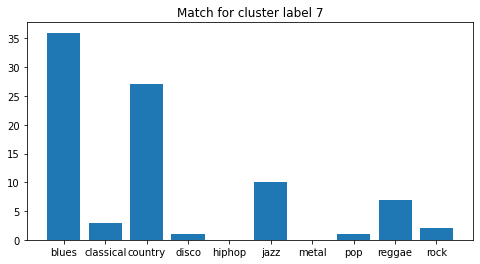

Most found label: blues
Number of blues found :36
Population of cluster: 87
Percentage of blues found: 36.0%
Ability to distinguish blues amoung other found genres in cluster: 41.4%


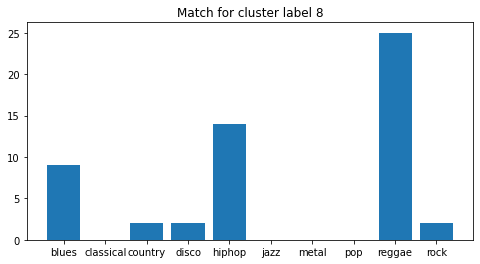

Most found label: reggae
Number of reggae found :25
Population of cluster: 54
Percentage of reggae found: 25.0%
Ability to distinguish reggae amoung other found genres in cluster: 46.3%


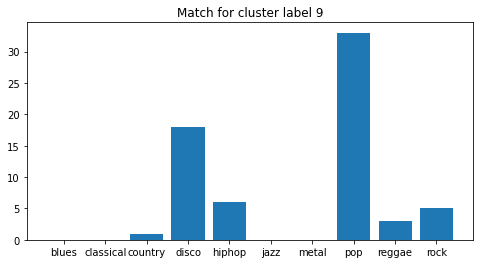

Most found label: pop
Number of pop found :33
Population of cluster: 66
Percentage of pop found: 33.0%
Ability to distinguish pop amoung other found genres in cluster: 50.0%


In [0]:
clusterLabels = pd.DataFrame(ac.labels_)
clusters,labels = compareLabels(clusterLabels,Y_enc,ac.n_clusters,columns)

In [0]:
def computeScoreAC(linkage,affinity):
    for lin in linkage:
        title = ""
        if lin == "ward":
            score = [0]*10
            for i in range(1,10):
                ac = AgglomerativeClustering(n_clusters = 10,linkage=lin,affinity="euclidean")
                pcaAc = PCA(n_components=i,whiten=False);
                xPcaAc = pcaAc.fit_transform(X_scaled)
                ac.fit(xPcaAc)
                score[i] = metrics.adjusted_rand_score(Y_enc, ac.labels_)
                title = "Adjusted Random Score for Differenct Number of Principal Components/" + lin +"/euclidean"
            plt.plot(range(1,10),score[1:])
            plt.title(title)
            plt.show()
        else:
            for aff in affinity:
                score = [0]*10
                for i in range(1,10):
                    ac = AgglomerativeClustering(n_clusters = 10,linkage=lin,affinity=aff)
                    pcaAc = PCA(n_components=i,whiten=False);
                    xPcaAc = pcaAc.fit_transform(X_scaled)
                    ac.fit(xPcaAc)
                    score[i] = metrics.adjusted_rand_score(Y_enc, ac.labels_)
                    title = "Adjusted Random Score for Differenct Number of Principal Components/" + lin +"/"+aff
                plt.plot(range(1,10),score[1:])
                plt.title(title)
                plt.show()

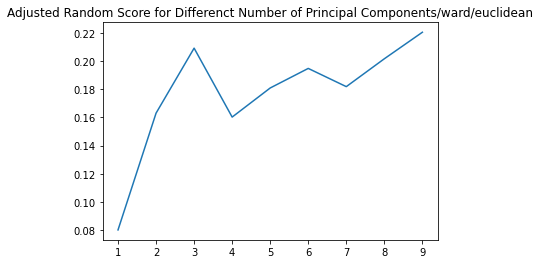

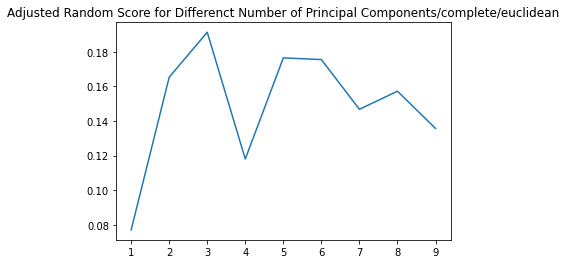

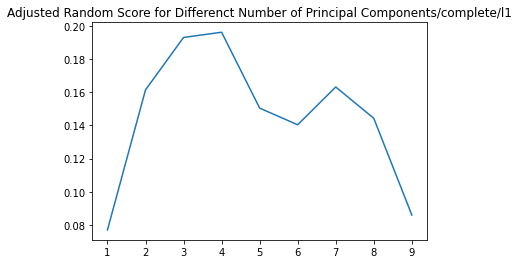

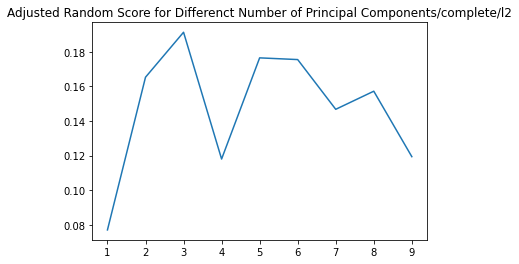

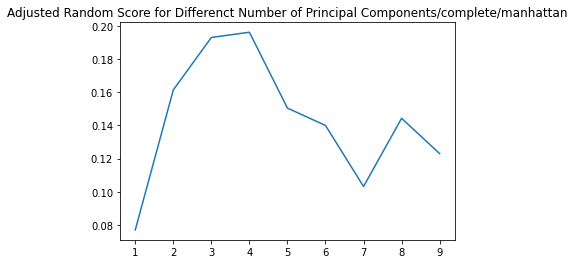

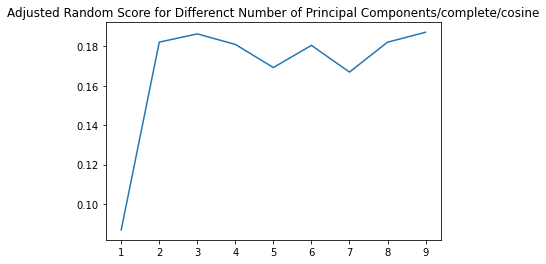

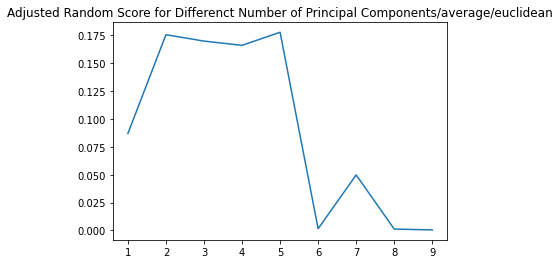

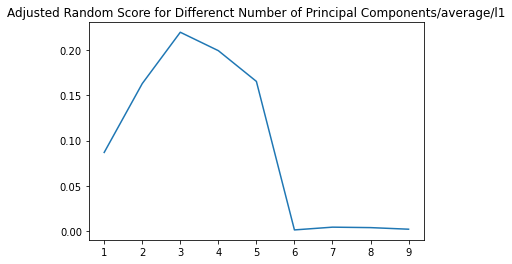

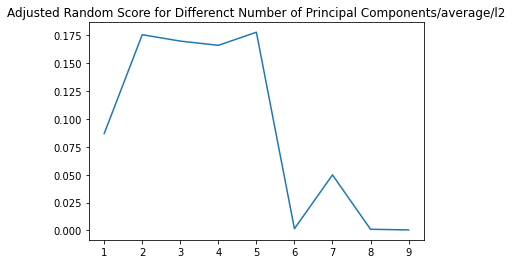

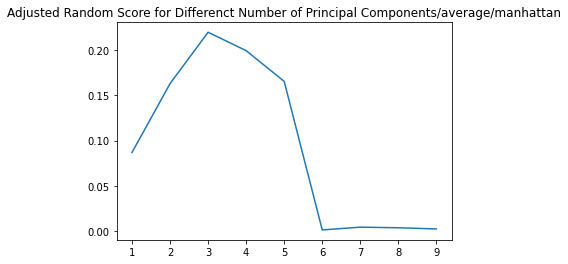

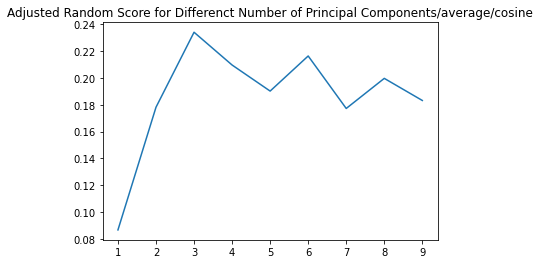

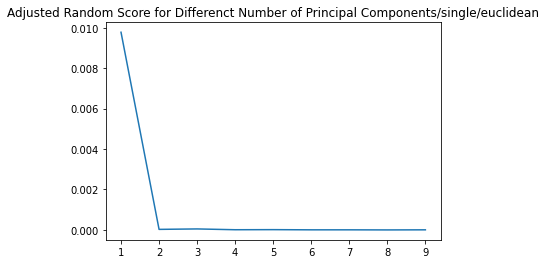

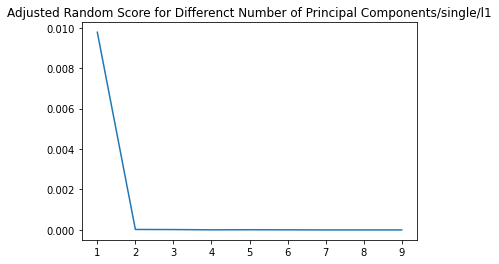

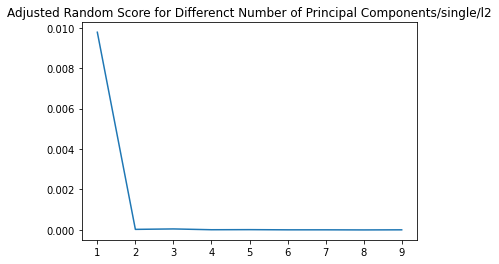

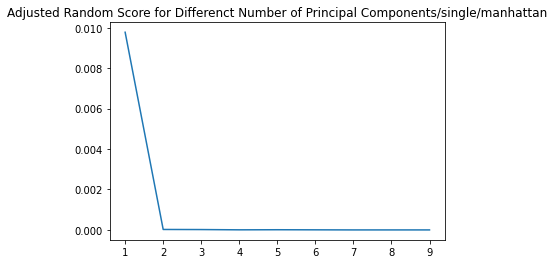

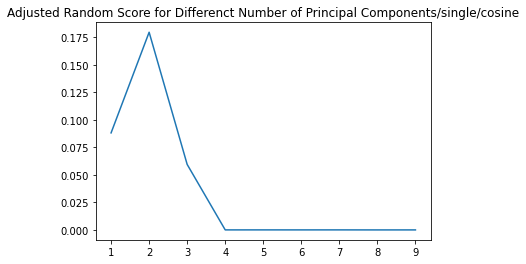

In [0]:
linkage = ["ward","complete","average","single"]
affinity = ["euclidean","l1","l2","manhattan","cosine"]
computeScoreAC(linkage,affinity)

In [118]:
from sklearn import metrics

pca = PCA(n_components=3,whiten=False, random_state=42)
xPCA = pca.fit_transform(X_scaled)
kmeans = KMeans(n_clusters=10,random_state=42)
kmeans.fit(xPCA)

print("ARI:" + str(metrics.adjusted_rand_score(Y_enc, kmeans.labels_)))
print("AMI:" + str(metrics.adjusted_mutual_info_score(Y_enc, kmeans.labels_)))
print("NMI:" + str(metrics.normalized_mutual_info_score(Y_enc, kmeans.labels_)))
print("Homogeneity:" + str(metrics.homogeneity_score(Y_enc, kmeans.labels_)))
print("Completeness:" + str(metrics.completeness_score(Y_enc, kmeans.labels_)))
print("V_Measure:" + str(metrics.v_measure_score(Y_enc, kmeans.labels_)))
print("Fowlkes Mallowes:" + str(metrics.fowlkes_mallows_score(Y_enc, kmeans.labels_)))

print("Sihouette Score:" + str(metrics.silhouette_score(xPCA, kmeans.labels_, metric='euclidean')))
print("Calinski Harabsz:" + str(metrics.calinski_harabasz_score(xPCA, kmeans.labels_)))
print("Davies Bouldin:" + str(metrics.davies_bouldin_score(xPCA, kmeans.labels_)))

ARI:0.2209574614562368
AMI:0.3546793043210014
NMI:0.36639271142243757
Homogeneity:0.363666292972991
Completeness:0.36916031876835215
V_Measure:0.3663927114224375
Fowlkes Mallowes:0.3010384185241236
Sihouette Score:0.31891315520600666
Calinski Harabsz:574.8472908512032
Davies Bouldin:1.0171999464704513


In [119]:
pca = PCA(n_components=3,whiten=False, random_state=42)
xPCA = pca.fit_transform(X_scaled)
spec = SpectralClustering(n_clusters=10,assign_labels="discretize",random_state=42,affinity="nearest_neighbors",
                         n_neighbors=20)
spec.fit(xPCA)

print("ARI:" + str(metrics.adjusted_rand_score(Y_enc, spec.labels_)))
print("AMI:" + str(metrics.adjusted_mutual_info_score(Y_enc, spec.labels_)))
print("NMI:" + str(metrics.normalized_mutual_info_score(Y_enc, spec.labels_)))
print("Homogeneity:" + str(metrics.homogeneity_score(Y_enc, spec.labels_)))
print("Completeness:" + str(metrics.completeness_score(Y_enc, spec.labels_)))
print("V_Measure:" + str(metrics.v_measure_score(Y_enc, spec.labels_)))
print("Fowlkes Mallowes:" + str(metrics.fowlkes_mallows_score(Y_enc, spec.labels_)))

print("Sihouette Score:" + str(metrics.silhouette_score(xPCA, spec.labels_, metric='euclidean')))
print("Calinski Harabsz:" + str(metrics.calinski_harabasz_score(xPCA, spec.labels_)))
print("Davies Bouldin:" + str(metrics.davies_bouldin_score(xPCA, spec.labels_)))

ARI:0.2148891541659434
AMI:0.3498829981757932
NMI:0.36179441161671394
Homogeneity:0.3575385121931227
Completeness:0.36615285036292694
V_Measure:0.36179441161671394
Fowlkes Mallowes:0.296465103739242
Sihouette Score:0.3163590822688426
Calinski Harabsz:541.2311180490914
Davies Bouldin:0.9485972121350592


In [120]:
pca = PCA(n_components=3,whiten=False, random_state=42)
xPCA = pca.fit_transform(X_scaled)
ac = AgglomerativeClustering(n_clusters = 10,linkage="average",affinity="cosine")

ac.fit(xPCA)

print("ARI:" + str(metrics.adjusted_rand_score(Y_enc, ac.labels_)))
print("AMI:" + str(metrics.adjusted_mutual_info_score(Y_enc, ac.labels_)))
print("NMI:" + str(metrics.normalized_mutual_info_score(Y_enc, ac.labels_)))
print("Homogeneity:" + str(metrics.homogeneity_score(Y_enc, ac.labels_)))
print("Completeness:" + str(metrics.completeness_score(Y_enc, ac.labels_)))
print("V_Measure:" + str(metrics.v_measure_score(Y_enc, ac.labels_)))
print("Fowlkes Mallowes:" + str(metrics.fowlkes_mallows_score(Y_enc, ac.labels_)))

print("Sihouette Score:" + str(metrics.silhouette_score(xPCA, ac.labels_, metric='euclidean')))
print("Calinski Harabsz:" + str(metrics.calinski_harabasz_score(xPCA, ac.labels_)))
print("Davies Bouldin:" + str(metrics.davies_bouldin_score(xPCA, ac.labels_)))

ARI:0.23387042295105379
AMI:0.3474953341495275
NMI:0.36031640555511085
Homogeneity:0.33770201562102203
Completeness:0.38617694411833786
V_Measure:0.36031640555511085
Fowlkes Mallowes:0.3355428721300203
Sihouette Score:0.23325137403123675
Calinski Harabsz:382.4287692192203
Davies Bouldin:1.0493657199095505
